# Prepare and Clean Data
---

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read Jan trip file into notebook
trip1 = pd.read_csv('202201-divvy-tripdata.csv')
trip1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [3]:
# check data information
trip1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


In [4]:
# remove unnecessary columns
trip1_shorten = trip1.reindex(columns=['rideable_type', 'started_at', 'ended_at', 'member_casual'])

# remove duplicates
trip1_shorten.drop_duplicates(inplace=True)

#sort dataframe by started_at column
trip1_shorten.sort_values(by='started_at', ascending=True, inplace=True)

# convert time columns to pandas datetime dtype
time_stamp = ['started_at', 'ended_at']
trip1_shorten[time_stamp] = trip1_shorten[time_stamp].astype('datetime64[ns]')

# convert category columns to pandas Categorical dtype
categories = ['rideable_type', 'member_casual']
trip1_shorten[categories] = trip1_shorten[categories].astype('category')

trip1_shorten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103766 entries, 73479 to 50646
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rideable_type  103766 non-null  category      
 1   started_at     103766 non-null  datetime64[ns]
 2   ended_at       103766 non-null  datetime64[ns]
 3   member_casual  103766 non-null  category      
dtypes: category(2), datetime64[ns](2)
memory usage: 2.6 MB


In [5]:
# calculate trip length and convert to minute format
trip1_shorten['trip_length'] = trip1_shorten['ended_at'] - trip1_shorten['started_at']
trip1_shorten['trip_length'] = trip1_shorten['trip_length'].astype('timedelta64[s]') / 60

trip1_shorten[['trip_length']].describe().T

,count,mean,std,min,25%,50%,75%,max
trip_length,103766.0,15.265046,178.221462,0.0,4.833333,7.866667,13.533333,29271.1


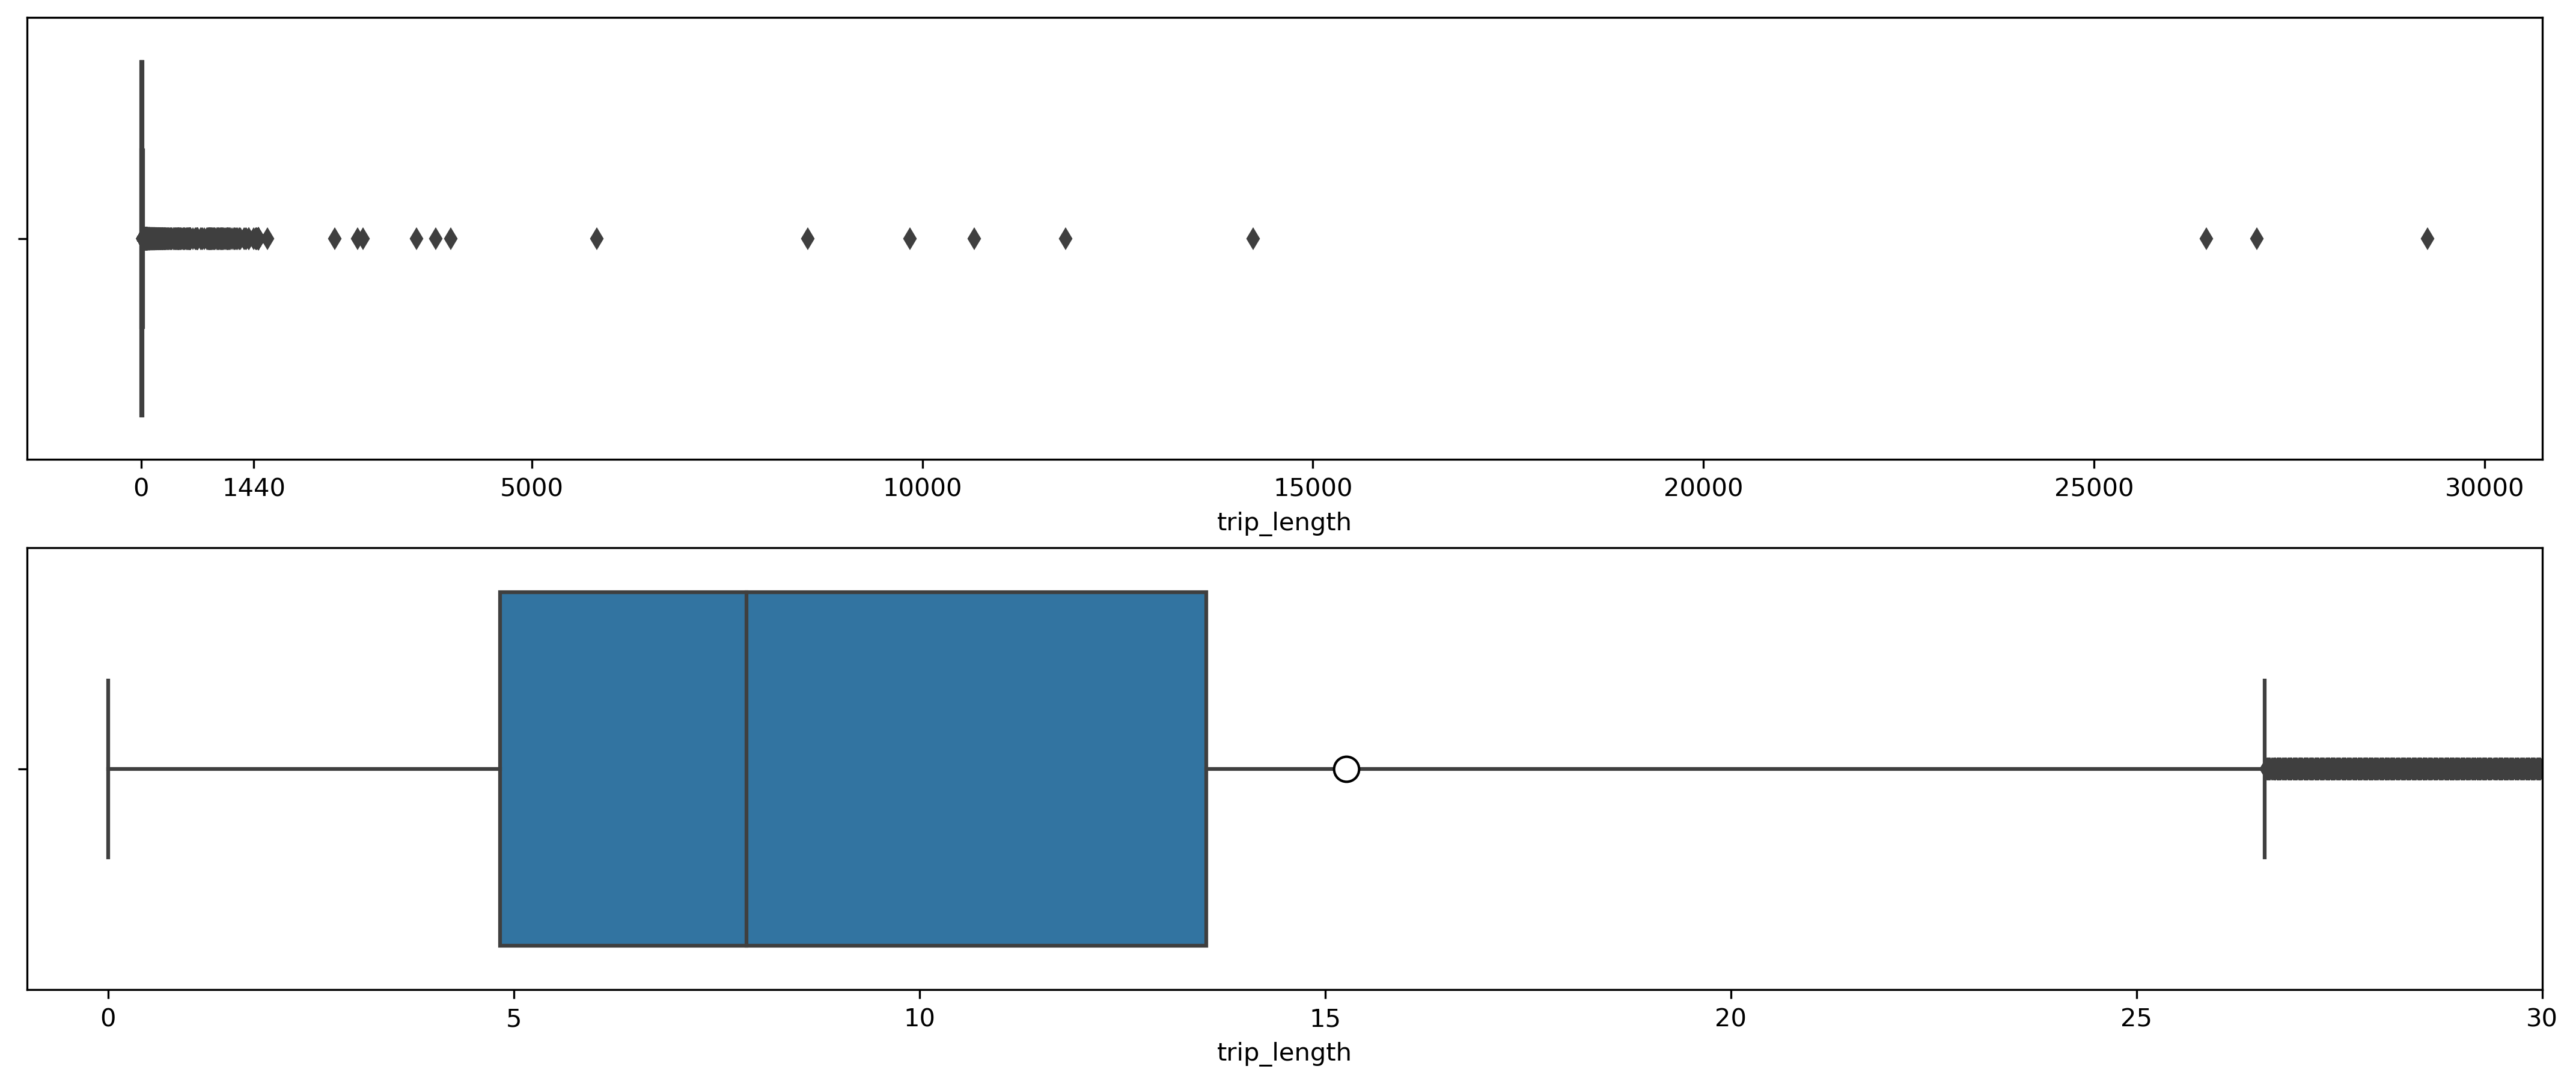

In [6]:
# create a boxplot to visualize trip_length
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.boxplot(x = trip1_shorten['trip_length'], ax=ax1)
sns.boxplot(x = trip1_shorten['trip_length'], ax=ax2, showmeans=True, meanprops={'marker': 'o', "markerfacecolor": "white", "markeredgecolor": "black", "markersize":"10"})

ax1.set_xticks([0, 1440, 5000, 10000, 15000, 20000, 25000, 30000])
ax2.set_xlim((-1,30))
fig.set_dpi(300)
plt.show()

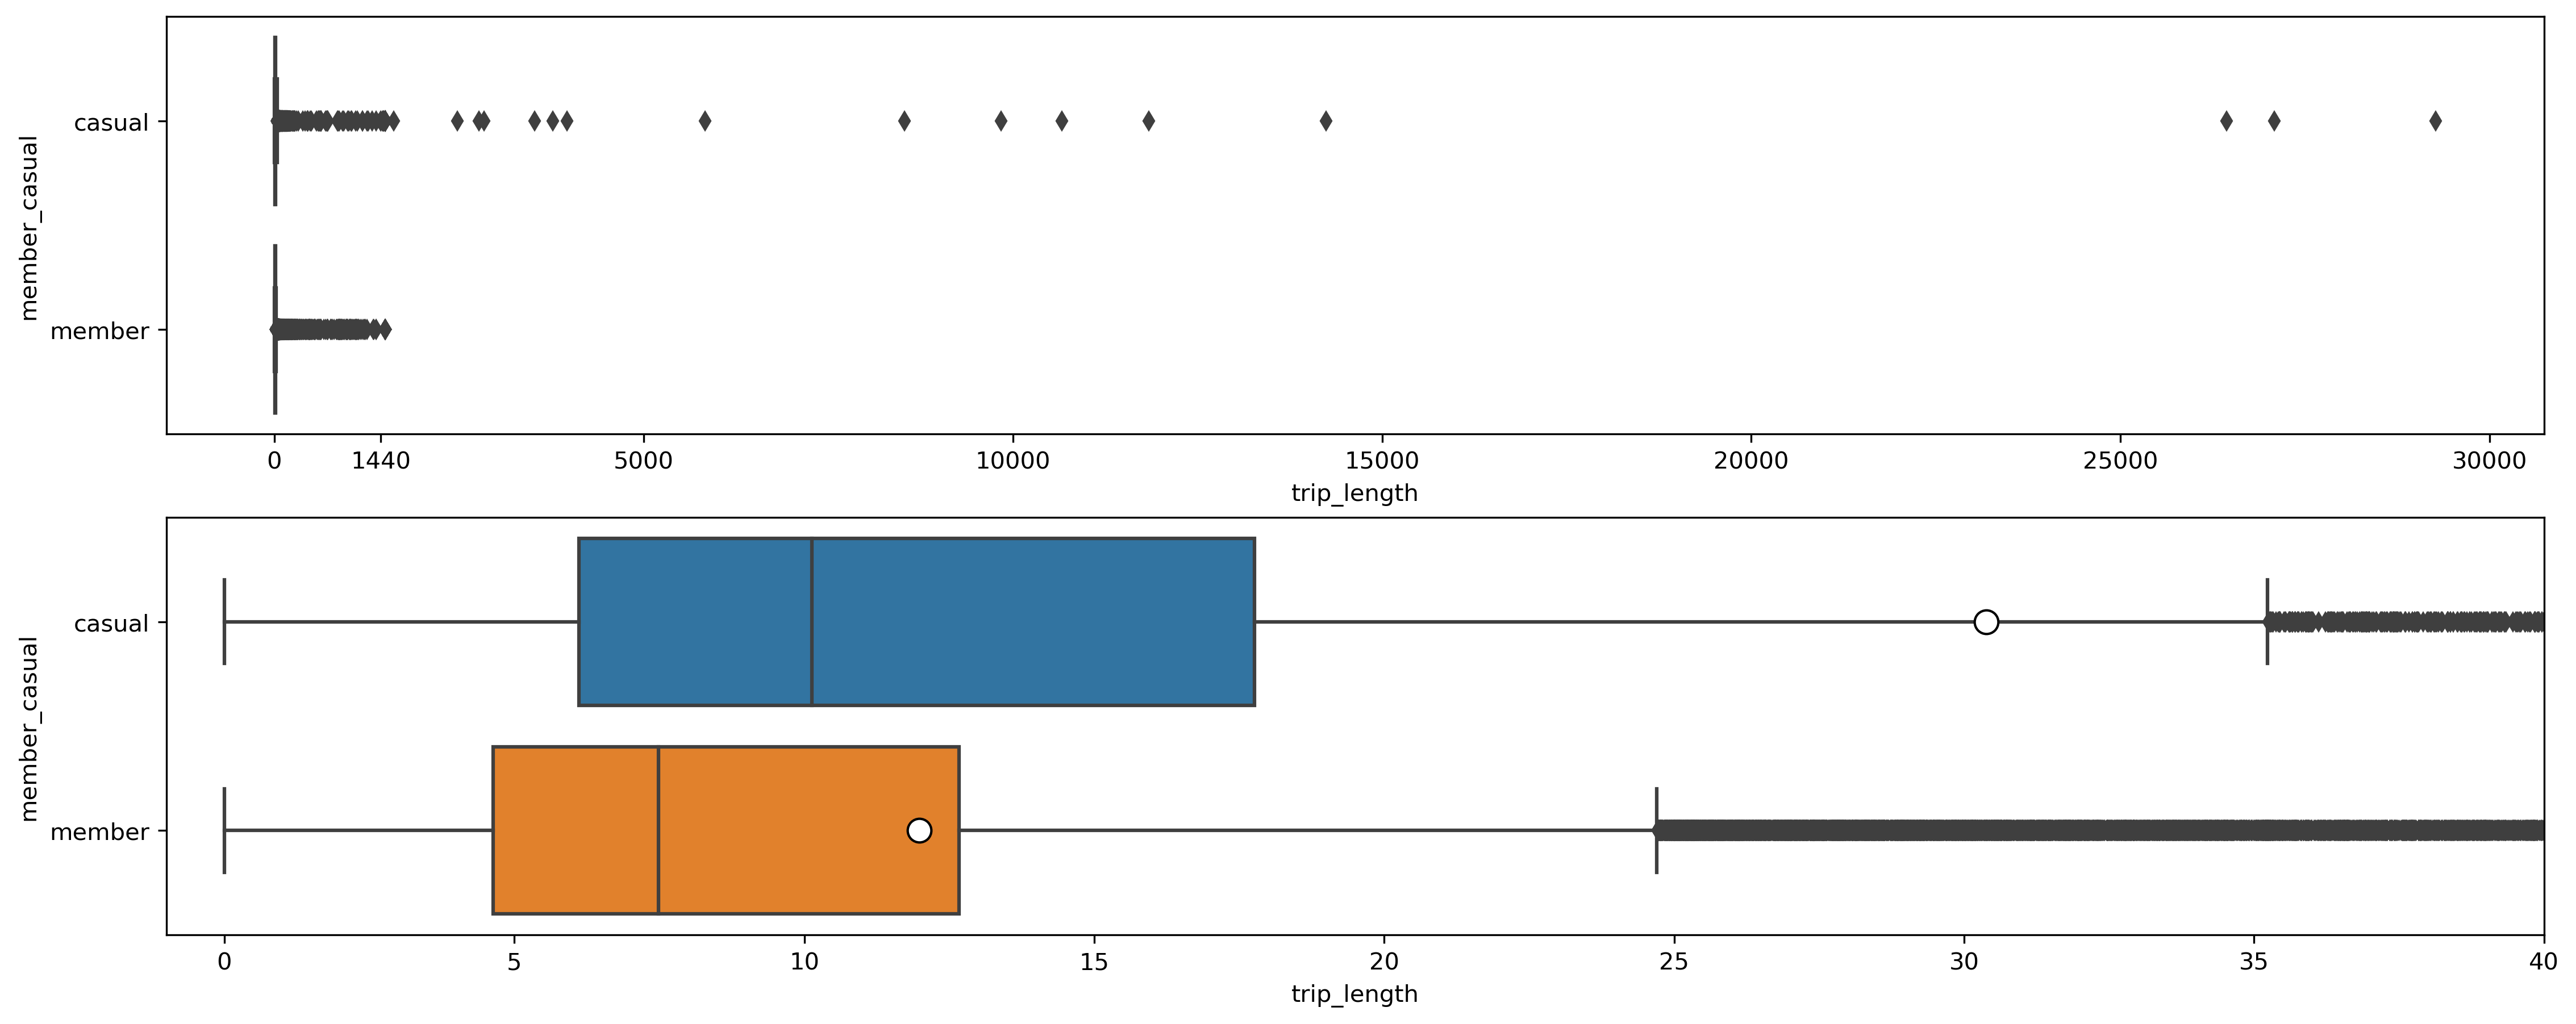

In [7]:
# compare trip_length between casual rider and member
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.boxplot(data=trip1_shorten, x = 'trip_length', y='member_casual', ax=ax1)
sns.boxplot(data=trip1_shorten, x = 'trip_length', y='member_casual', ax=ax2, showmeans=True, meanprops={'marker': 'o', "markerfacecolor": "white", "markeredgecolor": "black", "markersize":"10"})

ax1.set_xticks([0, 1440, 5000, 10000, 15000, 20000, 25000, 30000])
ax2.set_xlim((-1, 40))
fig.set_dpi(300)
plt.show()

In [8]:
# proportion of trips that are longer than 1 hour
grouped_over_60 = trip1_shorten[trip1_shorten['trip_length'] > 60].groupby(['member_casual', 'rideable_type'])
grouped = trip1_shorten.groupby(['member_casual', 'rideable_type'])

(grouped_over_60.size()*100 / grouped.size()).unstack()

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,6.653284,12.486993,0.916478
member,0.709087,NaN,0.594774


In [9]:
# create outlier filter for each combination of customer type & bike type
outlier_value = trip1_shorten.groupby(['member_casual', 'rideable_type'])['trip_length'].transform(lambda x: x.quantile(0.95))
outlier_value

73479    81.585833
68510    32.600000
64490    32.600000
73485    81.585833
73478    81.585833
           ...    
88923    32.600000
12205    29.383333
88890    27.383333
97899    27.383333
50646    29.383333
Name: trip_length, Length: 103766, dtype: float64

In [10]:
# create a new dataframe that store outliers for Jan
trip1_outliers = trip1_shorten[trip1_shorten['trip_length'] > outlier_value]

trip1_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_length,5185.0,125.396059,788.677958,27.4,32.783333,38.55,51.533333,29271.1


,count,mean,std,min,25%,50%,75%,max
trip_length_m,98576.0,9.473038,7.238623,0.016667,4.7,7.516667,12.283333,128.183333


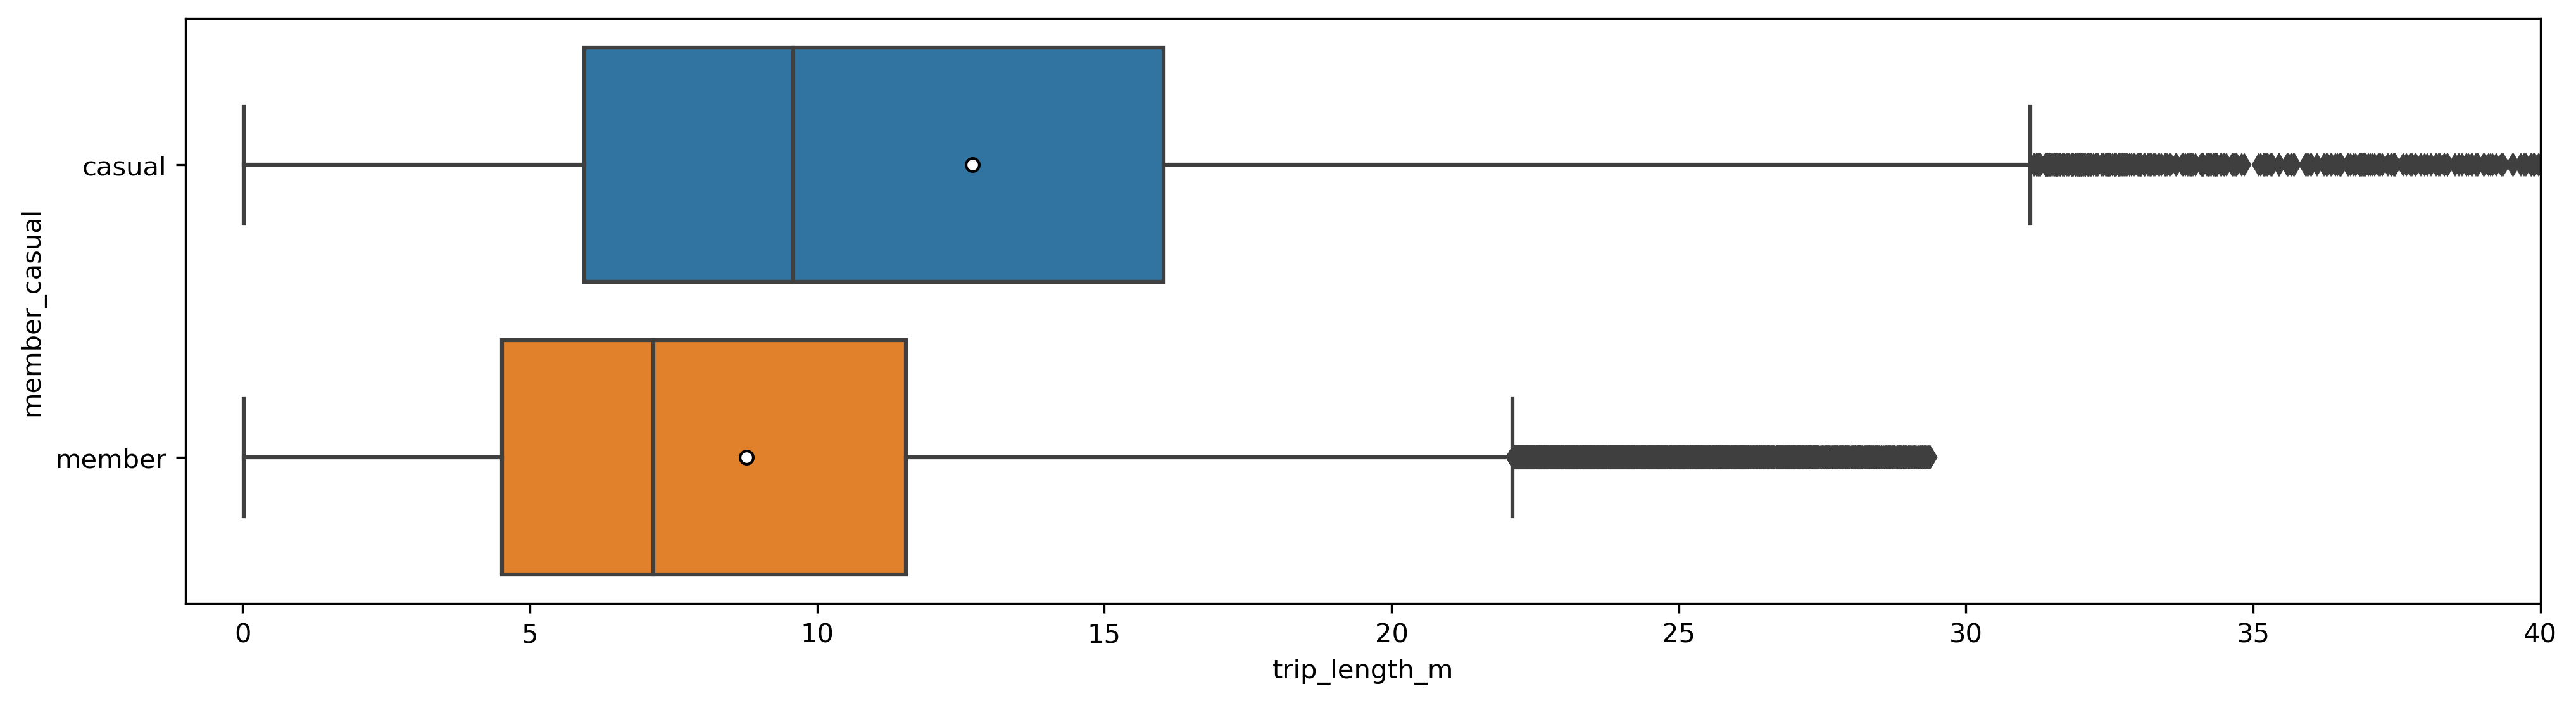

In [41]:
# create a clean dataframe for Jan with outliers and invalid values removed
trip1_clean = trip1_shorten.loc[(trip1_shorten['trip_length'] > 0) & (trip1_shorten['trip_length'] <= outlier_value)].copy(deep=True)
trip1_clean.rename(columns={'trip_length': 'trip_length_m'}, inplace=True)

display(trip1_clean.describe().T)

#boxplots of casual and member after removing outliers
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(111)

sns.boxplot(data=trip1_clean, x = 'trip_length_m', y='member_casual', showmeans=True, meanprops={'marker': 'o', "markerfacecolor": "white", "markeredgecolor": "black", "markersize":"5"})

ax1.set_xlim((-1, 40))
fig.set_dpi(300)
plt.show()

# Analyze Total Trip
---

member_casual,casual,member
total_trips,17590,80986


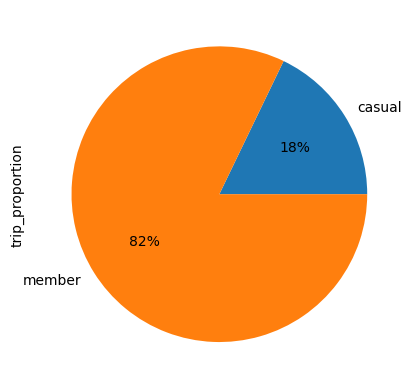

In [48]:
# Compare the trips proportion of member and casual
member_casual_trip_proportion = trip1_clean.groupby('member_casual').size()
display(member_casual_trip_proportion.to_frame(name='total_trips').T)
member_casual_trip_proportion.plot(kind='pie', y=0, autopct='%1.0f%%', legend=False, ylabel='trip_proportion')
plt.show()

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,6625,913,10052
member,45687,0,35299


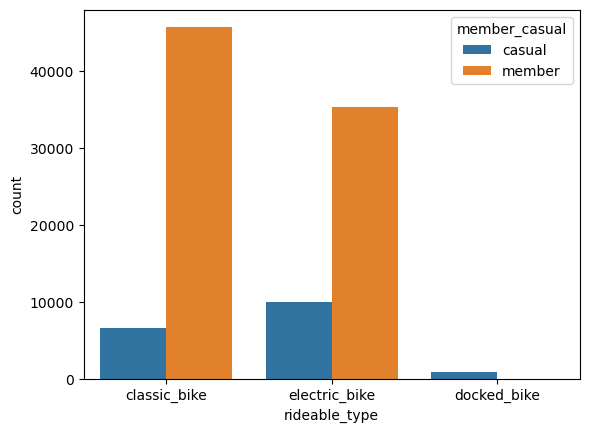

In [14]:
# total trips betwen casual and member by bike type
total_trip_by_customer_vs_bike_type = trip1_clean.groupby(['member_casual', 'rideable_type']).size().unstack()
display(total_trip_by_customer_vs_bike_type)
sns.countplot(data=trip1_clean, x='rideable_type', hue='member_casual', order=['classic_bike', 'electric_bike', 'docked_bike'])
plt.show()

member_casual,casual,member
hour,,
0,414,610
1,385,436
2,311,313
3,136,188
4,95,248
...,...,...
19,893,4337
20,639,2720
21,600,2019


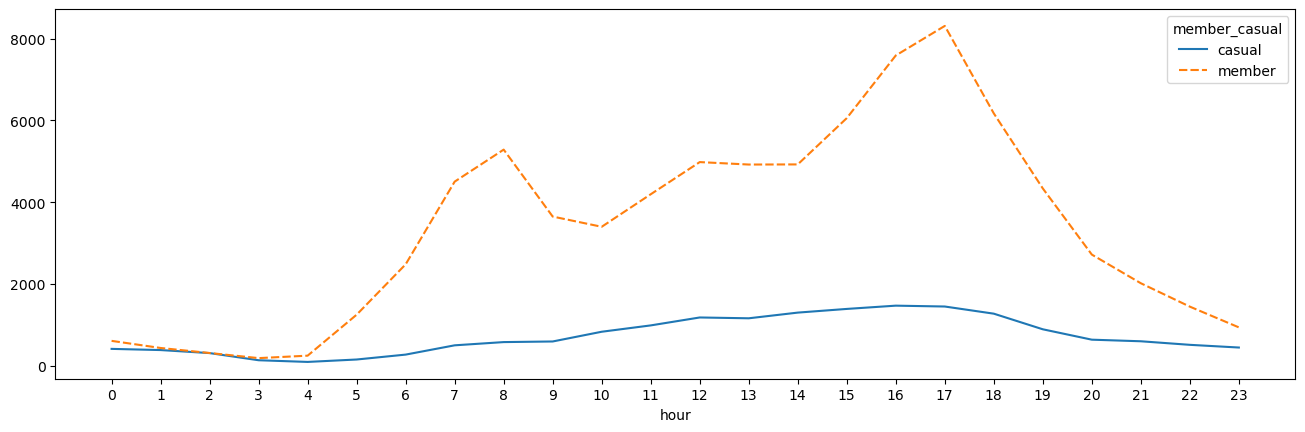

In [16]:
# set dataframe display option
frame_display = pd.option_context('display.max_rows', 10)

# total trips betwen casual and member by hour
total_trip_by_customer_vs_hour = trip1_clean.groupby([trip1_clean['started_at'].dt.hour, 'member_casual']).size().unstack()
total_trip_by_customer_vs_hour.index.name = 'hour'
with frame_display:
    display(total_trip_by_customer_vs_hour)

# visualization
fig, ax = plt.subplots()
fig.set_figwidth(16)
sns.lineplot(total_trip_by_customer_vs_hour, ax=ax)
ax.set_xticks(np.arange(24))
plt.show()

member_casual,casual,member
day_of_week,,
Thursday,2421,13376
Friday,2348,10809
Saturday,3589,10372
Sunday,2369,8431
Monday,2283,12711
Tuesday,2285,13068
Wednesday,2295,12219


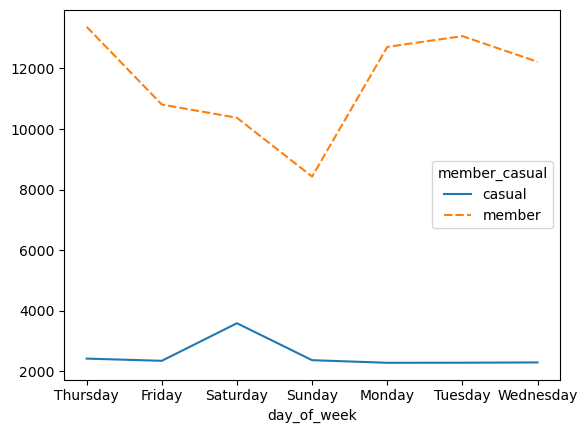

In [15]:
# total trips betwen casual and member by day of week
total_trip_by_customer_vs_DoW = trip1_clean.groupby([trip1_clean['started_at'].dt.strftime('%A'), 'member_casual']).size().unstack()
DoW_order = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
total_trip_by_customer_vs_DoW = total_trip_by_customer_vs_DoW.reindex(index=DoW_order)
total_trip_by_customer_vs_DoW.index.name = 'day_of_week'
display(total_trip_by_customer_vs_DoW)

#visualization
sns.lineplot(total_trip_by_customer_vs_DoW)
plt.show()

member_casual,casual,member
date,,
1,1035,1388
2,502,1405
3,504,2468
4,657,3486
5,401,2199
...,...,...
27,505,3138
28,269,1478
29,452,1775


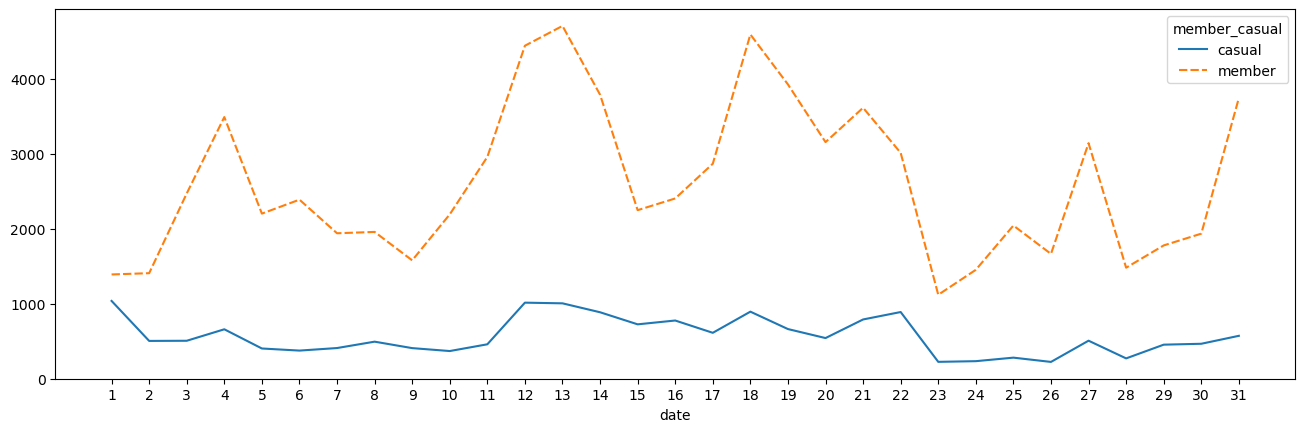

In [17]:
# total trips betwen casual and member by hour
total_trip_by_customer_vs_month_date = trip1_clean.groupby([trip1_clean['started_at'].dt.day, 'member_casual']).size().unstack()
total_trip_by_customer_vs_month_date.index.name = 'date'
with frame_display:
    display(total_trip_by_customer_vs_month_date)

# visualization
fig, ax = plt.subplots()
fig.set_figwidth(16)
sns.lineplot(total_trip_by_customer_vs_month_date, ax=ax)
ax.set_xticks(np.arange(1,32))
plt.show()

# Analyze Average Trip Length
---

member_casual,casual,member
trip_length_m,12.703131,8.771469


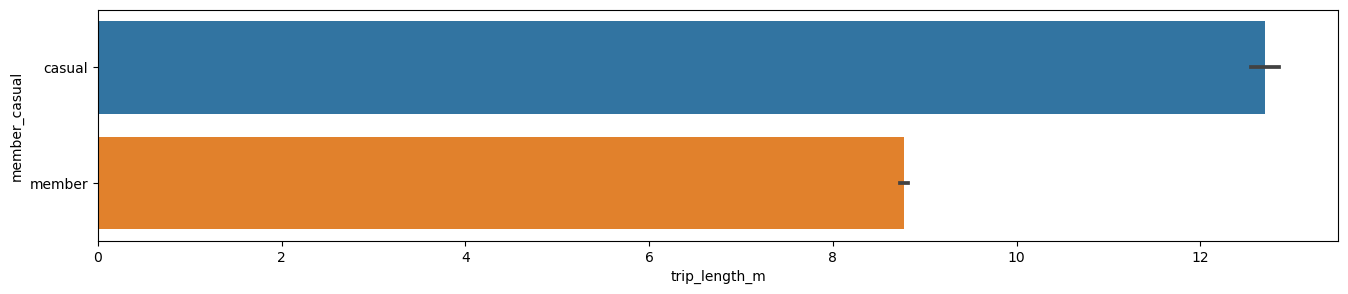

In [40]:
# Compare average trip length of member and casual
member_casual_avg_length = trip1_clean.groupby('member_casual')['trip_length_m'].mean().to_frame()
display(member_casual_avg_length.T)

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(3)
sns.barplot(data=trip1_clean, x='trip_length_m', y='member_casual', orient='h', ax=ax)
plt.show()

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,14.014360,25.409821,10.684816
member,8.995764,NaN,8.481166


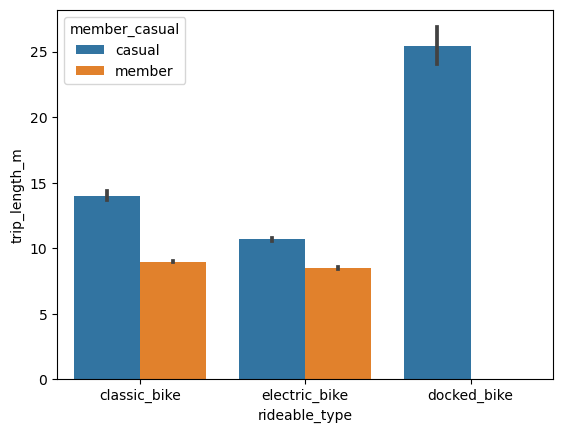

In [19]:
# avg trip length betwen casual and member by bike type
avg_length_by_customer_vs_bike_type = trip1_clean.groupby(['member_casual', 'rideable_type'])['trip_length_m'].mean().unstack()
display(avg_length_by_customer_vs_bike_type)

#visualization
sns.barplot(data=trip1_clean, x='rideable_type', y = 'trip_length_m', hue='member_casual', order=['classic_bike', 'electric_bike', 'docked_bike'])
plt.show()

member_casual,casual,member
hour,,
0,12.699557,9.029126
1,13.110606,9.180887
2,13.677706,9.048136
3,13.131250,9.079787
4,14.259825,8.476008
...,...,...
19,12.267245,8.634717
20,12.370370,8.482267
21,11.980722,8.619721


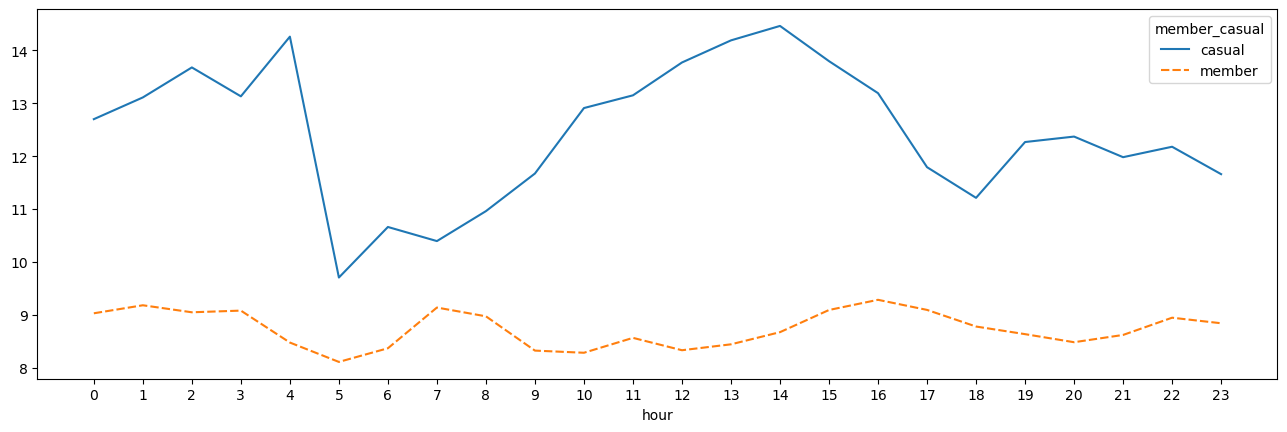

In [30]:
# avg trip length betwen casual and member by hour
avg_length_by_customer_vs_hour = trip1_clean.groupby([trip1_clean['started_at'].dt.hour, 'member_casual'])['trip_length_m'].mean().unstack()
avg_length_by_customer_vs_hour.index.name = 'hour'
with frame_display:
    display(avg_length_by_customer_vs_hour)

# visualization
fig, ax = plt.subplots()
fig.set_figwidth(16)
sns.lineplot(avg_length_by_customer_vs_hour, ax=ax)
ax.set_xticks(np.arange(24))
plt.show()

member_casual,casual,member
day_of_week,,
Thursday,12.222353,8.570255
Friday,11.760094,8.748248
Saturday,13.840067,9.006823
Sunday,14.025390,9.016129
Monday,12.186341,8.733252
Tuesday,12.121313,8.837594
Wednesday,12.125614,8.612718


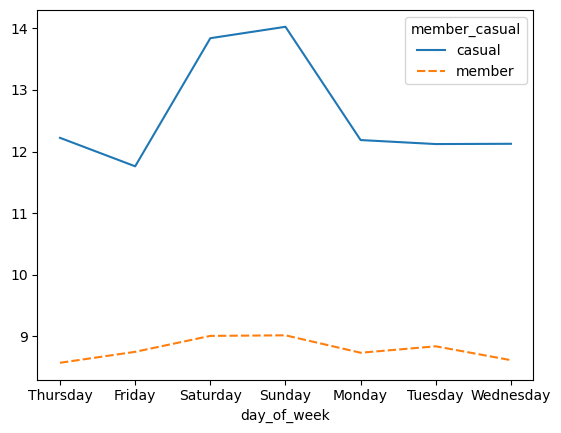

In [20]:
# avg trip length betwen casual and member by day of week
avg_length_by_customer_vs_DoW = trip1_clean.groupby([trip1_clean['started_at'].dt.strftime('%A'), 'member_casual'])['trip_length_m'].mean().unstack()
avg_length_by_customer_vs_DoW = avg_length_by_customer_vs_DoW.reindex(index=DoW_order)
avg_length_by_customer_vs_DoW.index.name = 'day_of_week'
display(avg_length_by_customer_vs_DoW)

#visualization
sns.lineplot(avg_length_by_customer_vs_DoW)
plt.show()

member_casual,casual,member
date,,
1,14.513913,8.999159
2,14.332769,9.356323
3,12.235681,8.846927
4,12.159006,9.233984
5,10.376559,8.298120
...,...,...
27,13.427789,8.829520
28,13.412701,9.469283
29,13.691814,9.418826


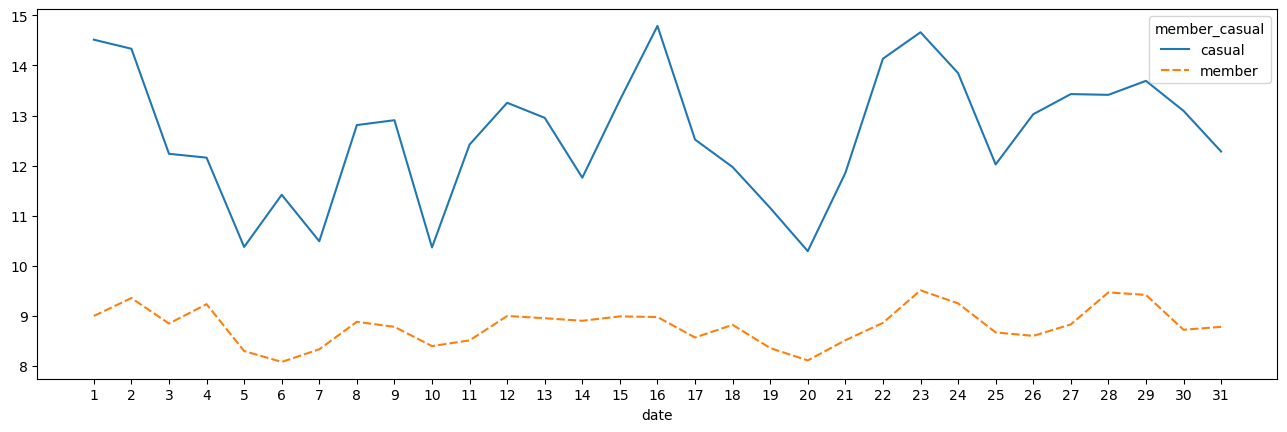

In [32]:
# avg trip length betwen casual and member by hour
avg_length_by_customer_vs_month_date = trip1_clean.groupby([trip1_clean['started_at'].dt.day, 'member_casual'])['trip_length_m'].mean().unstack()
avg_length_by_customer_vs_month_date.index.name = 'date'
with frame_display:
    display(avg_length_by_customer_vs_month_date)

# visualization
fig, ax = plt.subplots()
fig.set_figwidth(16)
sns.lineplot(avg_length_by_customer_vs_month_date, ax=ax)
ax.set_xticks(np.arange(1,32))
plt.show()